# Introdução aos métodos discretos

Nome: Ana Beatriz Nogueira Rubião Graça

# Lista 12

### 1) Aproximar a função $sen(\pi x)$ por uma função linear contínua por partes, usando a projeção L2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a) Defina a função a ser aproximada: $u(x) = sen(\pi x)$

In [3]:
def u(x):
    return np.sin(np.pi*x)
    

b) Defina as funções base a nível de elemento

In [4]:
def phi_0(t):
    return (1/2)*(1-t)
    

def phi_1(t):
    return (1/2)*(t+1)

c) Construa a matriz de massa usando a quadratura de Gauss com 2 pontos.
Defina a matriz local, que será utilizado para construir a matriz global.

In [5]:
def Matriz(x):
    n = len(x)
    h = x[1] - x[0]
    # matriz global
    M = np.zeros((n,n))
    # matriz local
    Me = np.zeros((2,2))
    # pesos e pontos da Quadratura de Gauss
    w = [1,1]
    t = [-np.sqrt(3)/3, np.sqrt(3)/3]
    
    # Construindo Me
    Me[0,0] = w[0]*(phi_0(t[0])*phi_0(t[0])*h/2)+w[1]*(phi_0(t[1])*phi_0(t[1])*h/2)
    Me[0,1] = w[0]*(phi_0(t[0])*phi_1(t[0])*h/2)+w[1]*(phi_0(t[1])*phi_1(t[1])*h/2)
    Me[1,0] = w[0]*(phi_1(t[0])*phi_0(t[0])*h/2)+w[1]*(phi_1(t[1])*phi_0(t[1])*h/2)
    Me[1,1] = w[0]*(phi_1(t[0])*phi_1(t[0])*h/2)+w[1]*(phi_1(t[1])*phi_1(t[1])*h/2)

    # Construindo M
    for i in range(n):
      for j in range(n):
        if(i==j):
          if(i==0):
            M[i,j] = Me[0,0]
            M[i,j+1] = Me[0,1]
          elif(i==n-1):
            M[i,j-1] = Me[1,0]
            M[i,j] = Me[1,1]
          else:
            M[i,j-1] = M[i,j-1] + Me[1,0]
            M[i,j] = M[i,j] + Me[0,0] + Me[1,1]
            M[i,j+1] = M[i,j+1] + Me[0,1]
    return M

d) Construa o vetor de carga usando a quadratura de Gauss com 2 pontos.
Defina a matriz local, que será utilizo para construir vetor global.

In [40]:
def Vetor(x, f):
    n = len(x)
    h = x[1] - x[0]
    b = np.zeros(n)
    be = np.zeros(2)
    w = [1,1]
    t = [-np.sqrt(3)/3, np.sqrt(3)/3]

    for i in range(n-1):
      be = np.zeros(2)
      ind = i
      xl = x[ind:ind+2]
      #encontrando x(t) = h/2*t+(x1+x0)/2
      xt = np.zeros(2)
      xt[0] = (xl[1] - xl[0])*t[0]/2 + (xl[1] + xl[0])/2
      xt[1] = (xl[1] - xl[0])*t[1]/2 + (xl[1] + xl[0])/2

      #encontrando be
      for j in range(2):
        be[0] = be[0] + f(xt[0])*phi_0(t[j])*w[j]*h/2
        be[1] = be[1] + f(xt[1])*phi_1(t[j])*w[j]*h/2

      for j in range(2):
        b[ind+j] = b[ind+j] + be[j]
    return b


e) Plote o gráfico da aproximação para 5, 9, 17, 33 e 65 pontos.

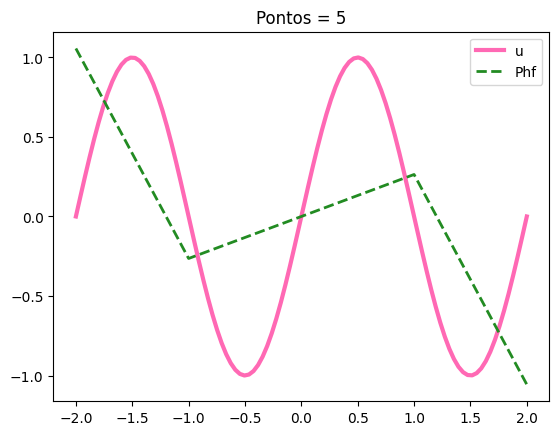

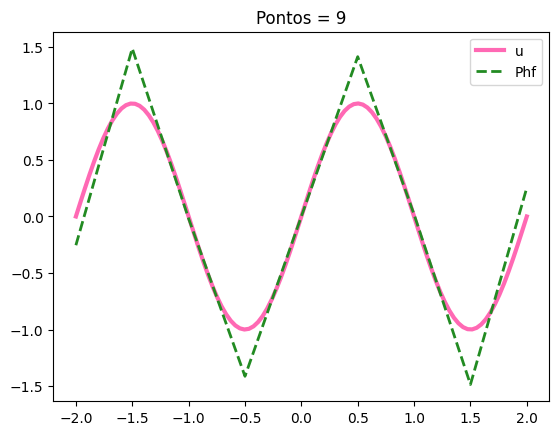

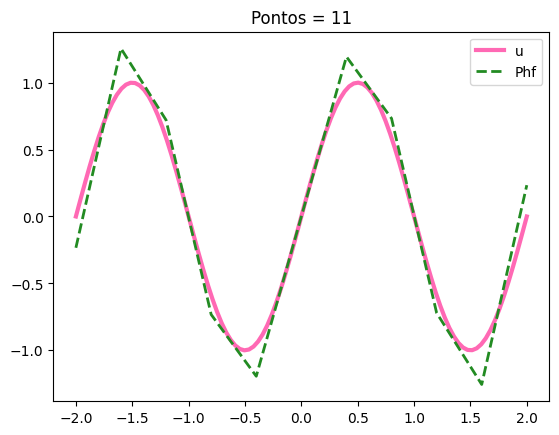

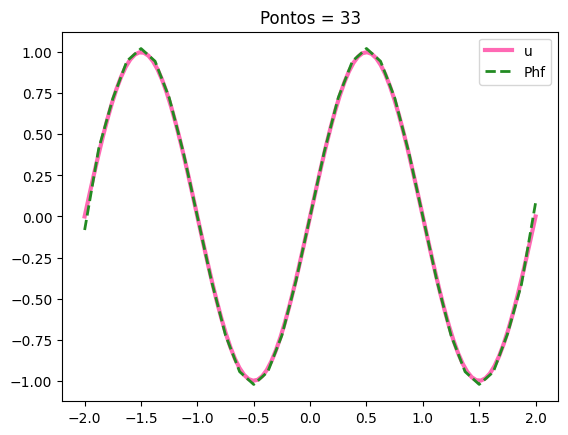

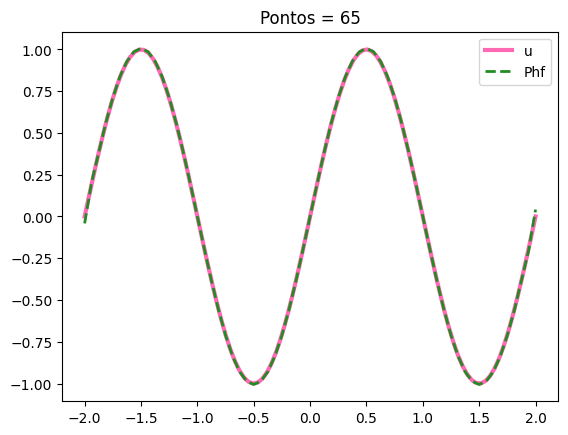

In [44]:
n = np.array([5,9,11,33,65])
for i in range(len(n)):
  x = np.linspace(-2,2,n[i])
  A = Matriz(x)
  b = Vetor(x,u)
  uh = np.linalg.solve(A, b)

  xx = np.linspace(-2, 2, 100)
  plt.figure()
  plt.plot(xx, u(xx), '-', label = 'u',color='hotpink',linewidth=3)
  plt.plot(x, uh, '--', label = 'Phf',color='forestgreen',linewidth=2)
  plt.legend()
  plt.title("Pontos = "+format(str(n[i])))
  plt.show()
